# Variances

## Unsupervised Learning: Principal Component Analysis

- sklearn doc: [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- cradit: [youtube](https://www.youtube.com/watch?v=z8APHNo1iA4&list=PLoTScYm9O0GH_3VrwwnQafwWQ6ibKnEtU&index=35)

---

## Goal
- reduce number of fetures

In [1]:
import pandas as pd

In [2]:
# read the data
df = pd.read_csv('../../subject/data04/Train_knight.csv')

In [3]:
# each feature is distance value, so we need to standardize the data
df.describe()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.097661,19.115025,91.772362,650.989447,0.096415,0.103716,0.089318,0.049001,0.180104,0.062618,...,16.239711,25.521558,107.093794,873.852010,0.132790,0.256784,0.276759,0.115806,0.288324,0.083987
std,3.422475,4.155107,23.561861,339.008193,0.013605,0.051021,0.079026,0.037671,0.026528,0.006633,...,4.653383,5.986852,32.418532,537.413359,0.022889,0.160271,0.215459,0.065403,0.057770,0.018468
min,6.981000,9.710000,43.790000,143.500000,0.065760,0.023440,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.742500,16.172500,75.467500,424.200000,0.086012,0.064605,0.029500,0.020362,0.161600,0.057710,...,13.060000,21.042500,84.377500,518.900000,0.116650,0.147325,0.116475,0.065320,0.250125,0.071887
50%,13.375000,18.700000,86.890000,552.600000,0.095895,0.094120,0.064315,0.034190,0.178800,0.061360,...,15.050000,25.245000,98.135000,698.750000,0.131400,0.211850,0.229800,0.102800,0.281350,0.079870
75%,16.027500,21.537500,105.550000,798.550000,0.106100,0.130475,0.132375,0.074670,0.194475,0.066188,...,19.087500,29.312500,127.050000,1092.250000,0.146650,0.341600,0.387550,0.162225,0.317250,0.092162
max,28.110000,39.280000,188.500000,2501.000000,0.139800,0.311400,0.426400,0.182300,0.304000,0.092960,...,36.040000,44.870000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.488200,0.207500


## Standardlization

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sensitivity    398 non-null    float64
 1   Hability       398 non-null    float64
 2   Strength       398 non-null    float64
 3   Power          398 non-null    float64
 4   Agility        398 non-null    float64
 5   Dexterity      398 non-null    float64
 6   Awareness      398 non-null    float64
 7   Prescience     398 non-null    float64
 8   Reactivity     398 non-null    float64
 9   Midi-chlorien  398 non-null    float64
 10  Slash          398 non-null    float64
 11  Push           398 non-null    float64
 12  Pull           398 non-null    float64
 13  Lightsaber     398 non-null    float64
 14  Survival       398 non-null    float64
 15  Repulse        398 non-null    float64
 16  Friendship     398 non-null    float64
 17  Blocking       398 non-null    float64
 18  Deflection

In [6]:
scaler = StandardScaler()

# we drop the 'knight' feature cause it is not numerical
X = df.drop(columns=['knight'])

# X_t is the fit and transformed dataframe to standardize
X_t = scaler.fit_transform(X)
X_t.shape

(398, 30)

In [7]:
# show values of dataFrame X first row
X.head(1).values

array([[1.180e+01, 1.726e+01, 7.526e+01, 4.319e+02, 9.087e-02, 6.232e-02,
        2.853e-02, 1.638e-02, 1.847e-01, 6.019e-02, 3.438e-01, 1.140e+00,
        2.225e+00, 2.506e+01, 5.463e-03, 1.964e-02, 2.079e-02, 5.398e-03,
        1.477e-02, 3.071e-03, 1.345e+01, 2.449e+01, 8.600e+01, 5.620e+02,
        1.244e-01, 1.726e-01, 1.449e-01, 5.356e-02, 2.779e-01, 8.121e-02]])

In [8]:
# these values are scaled form the original values with StandardScaler
X_t[:1]

array([[-0.67218979, -0.44700652, -0.70169097, -0.64707936, -0.40807974,
        -0.81235871, -0.77017938, -0.86703477,  0.17345922, -0.36654324,
        -0.21960619, -0.12686638, -0.30980935, -0.3253815 , -0.53039336,
        -0.33337546, -0.35349599, -1.04690351, -0.73192646, -0.26107806,
        -0.60025623, -0.17252075, -0.65148982, -0.5810137 , -0.36700933,
        -0.52592086, -0.61276422, -0.9529361 , -0.18065936, -0.15054689]])

## PCA: Principal Component Analysis
### What PCA is good for:
- Dimensionality reduction: Identifies directions (principal components) that capture the most variance in the data.

- Unsupervised structure: Helps understand which combinations of features contribute most to the overall variance.

- Visualizing high-dimensional data: Especially with 2D or 3D PCA projections.

### But here's the catch:
- PCA does not consider the target variable (like y in classification or regression).

- So, it's not ideal for determining feature importance for prediction — it only tells you which features contribute most to variance, not necessarily to predictive power.




In [9]:
from sklearn.decomposition import PCA

In [10]:
print(f'X_t.shape: {X_t.shape} # of (samples, features)') 

X_t.shape: (398, 30) # of (samples, features)


In [11]:
# first we determine n_components equal number of features
n_components = X_t.shape[1]
pca = PCA(n_components=n_components)

# fit the PCA model to the standardized data
pca.fit(X_t)

# show all properties of PCA
pca.__dict__

{'n_components': 30,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 30,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 2.18697199e-16,  1.16043412e-16, -4.37394398e-16, -4.46320814e-17,
        -4.97647708e-16,  1.70717711e-16,  7.53166373e-17, -1.16043412e-16,
         5.13268936e-17,  3.12424570e-16, -5.69059038e-17,  3.34740610e-16,
        -1.33896244e-16,  7.58745384e-17,  2.23160407e-18,  1.07116995e-16,
         1.02653787e-16, -3.52593443e-16, -3.83835900e-16,  1.57328087e-16,
        -4.68636855e-16,  1.87454742e-16,  4.99879312e-16,  4.46320814e-17,
         6.80639241e-17,  6.24849139e-17,  2.67792488e-17,  2.67792488e-17,
         1.33896244e-17,  7.40892551e-16]),
 'noise_variance_': 0.0,
 'n_samples_': 398,
 'n_components_': 30,
 'components_': array([[ 2.17568224e-01,  1.19320430e-01,  2.26375244e-01,
          

## Variances (Percentage):

In [12]:
# convert to percentage with multiplying by 100 
variances = pca.explained_variance_ratio_ * 100
variances

array([4.42124322e+01, 1.83133809e+01, 9.86939994e+00, 6.44725649e+00,
       5.48418978e+00, 3.86419671e+00, 2.40371418e+00, 1.86115266e+00,
       1.42841975e+00, 1.14635004e+00, 1.03990775e+00, 9.15659049e-01,
       8.25582942e-01, 4.49675980e-01, 3.24922360e-01, 2.80700452e-01,
       2.22879421e-01, 1.99287079e-01, 1.59928087e-01, 1.12338278e-01,
       1.11953696e-01, 8.29193824e-02, 7.91693696e-02, 5.73407566e-02,
       5.14260951e-02, 2.68407149e-02, 2.06171597e-02, 5.70303169e-03,
       2.27265764e-03, 3.83020159e-04])

In [13]:
# sum of explained_variance_ratio_ is 1.0
print(f'Sum of explained variance ratio: {pca.explained_variance_ratio_.sum()}')

Sum of explained variance ratio: 1.0


## Cumulative Variances (Percentage):

In [14]:
import numpy as np

In [15]:
# cumsum is cumulative sum of variances [0, 0 + 1, 0 + 1 + 2, ...]
cumulative = np.cumsum(variances)
cumulative

array([ 44.21243224,  62.52581316,  72.3952131 ,  78.84246959,
        84.32665937,  88.19085608,  90.59457026,  92.45572292,
        93.88414267,  95.03049271,  96.07040047,  96.98605952,
        97.81164246,  98.26131844,  98.5862408 ,  98.86694125,
        99.08982067,  99.28910775,  99.44903584,  99.56137412,
        99.67332781,  99.75624719,  99.83541656,  99.89275732,
        99.94418342,  99.97102413,  99.99164129,  99.99734432,
        99.99961698, 100.        ])

## Plot
From cumulative, just 7 features reach 90 percent

In [16]:
import matplotlib.pyplot as plt

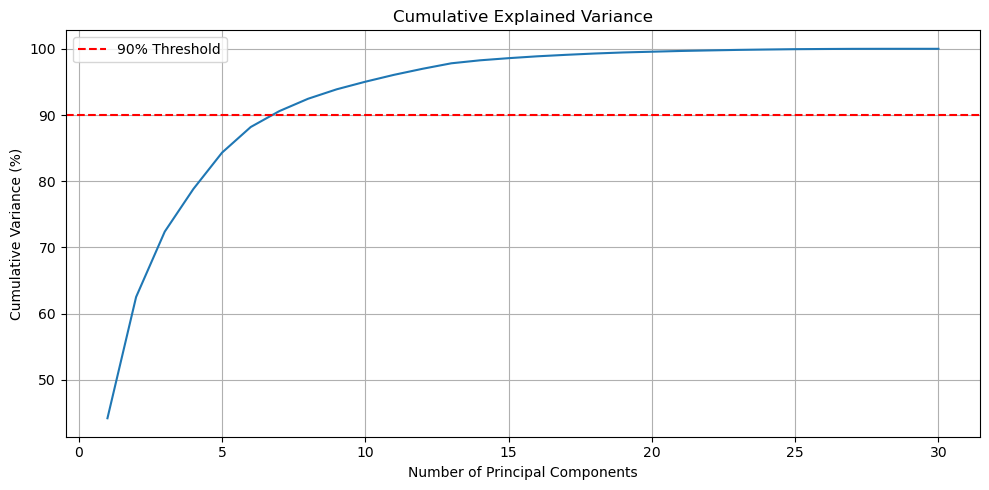

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative)+1), cumulative)
plt.axhline(y=90, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## My Bonus: Feature importances with forests of trees

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(X, df['knight'])
model.feature_importances_

array([0.04669736, 0.01471359, 0.05164751, 0.03178037, 0.00836174,
       0.01822603, 0.06486015, 0.1120227 , 0.00358743, 0.0035451 ,
       0.01508862, 0.00356964, 0.00985694, 0.03630669, 0.00403503,
       0.00421711, 0.00870398, 0.00593844, 0.00372645, 0.00637156,
       0.08041884, 0.01796833, 0.13195791, 0.12499491, 0.01744456,
       0.01499448, 0.04046499, 0.10039287, 0.0101259 , 0.00798077])

In [19]:
fs = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
fs

Stims            0.131958
Sprint           0.124995
Prescience       0.112023
Empowered        0.100393
Recovery         0.080419
Awareness        0.064860
Strength         0.051648
Sensitivity      0.046697
Attunement       0.040465
Lightsaber       0.036307
Power            0.031780
Dexterity        0.018226
Evade            0.017968
Combo            0.017445
Slash            0.015089
Delay            0.014994
Hability         0.014714
Burst            0.010126
Pull             0.009857
Friendship       0.008704
Agility          0.008362
Grasping         0.007981
Mass             0.006372
Blocking         0.005938
Repulse          0.004217
Survival         0.004035
Deflection       0.003726
Reactivity       0.003587
Push             0.003570
Midi-chlorien    0.003545
dtype: float64

<Axes: >

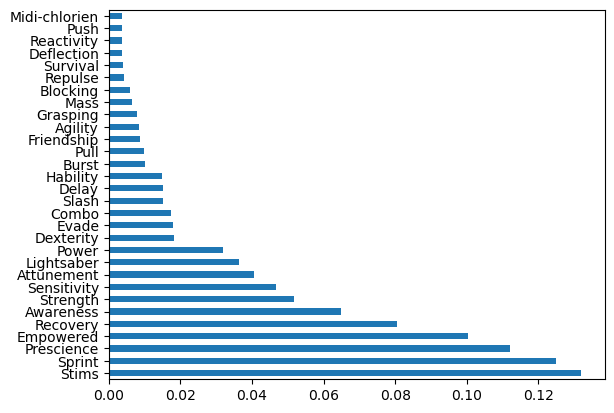

In [20]:
fs.plot(kind='barh')